In [107]:
from packages import Preprocesamiento as ppr
from packages import EDA as EDA
import os
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime,time,date
from datetime import timedelta
import pandas as pd
import numpy as np
%matplotlib notebook
%matplotlib inline

In [108]:
path_clean_data = os.path.join('Datos','Transformados')
df = pd.read_csv(os.path.join(path_clean_data,'df_transformado.csv'))
clima = pd.read_csv(os.path.join(path_clean_data,'df_clima.csv'))

In [109]:
df['ciudad'] = ''
df.loc[df['asset'] == 'Líbere Bilbao La Vieja', 'ciudad'] = 'bilbao'
df.loc[df['asset'] == 'Líbere Bilbao Museo', 'ciudad'] = 'bilbao'
df.loc[df['asset'] == 'Líbere Madrid Palacio Real', 'ciudad'] = 'madrid'
df.loc[df['asset'] == 'Líbere Valencia Abastos', 'ciudad'] = 'valencia'
df.loc[df['asset'] == 'Líbere Valencia Jardín Botánico', 'ciudad'] = 'valencia'
df.loc[df['asset'] == 'Líbere Vitoria', 'ciudad'] = 'vitoria-gasteiz'
df.loc[df['asset'] == 'Naitly Málaga Teatro Romano', 'ciudad'] = 'malaga'
df['checkin_time'] = pd.to_datetime(df['checkin_time'])
clima['fecha'] = pd.to_datetime(clima['fecha'])
df['mes']=df['checkin_time'].dt.month

## Grafico de comparacion de numero de reservas, numero de cancelaciones y porcentaje de cancelaciones por meses en cada ciudad

/tmp/ipykernel_8355/3072377270.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1[0].set_xticklabels(meses)
/tmp/ipykernel_8355/3072377270.py:15: MatplotlibDeprecationWarning: Passing the emit parameter of set_ylim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ax1[0].set_ylim(0, 2500, 50)
/tmp/ipykernel_8355/3072377270.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1[1].set_xticklabels(meses)
/tmp/ipykernel_8355/3072377270.py:19: MatplotlibDeprecationWarning: Passing the emit parameter of set_ylim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ax1[1].set_ylim(0, 2500, 50)
/tmp/ipykernel_8355/3072377270.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1[2].set_xticklabels(meses)


Text(0.5, 1.0, 'Porcentaje de cancelaciones')

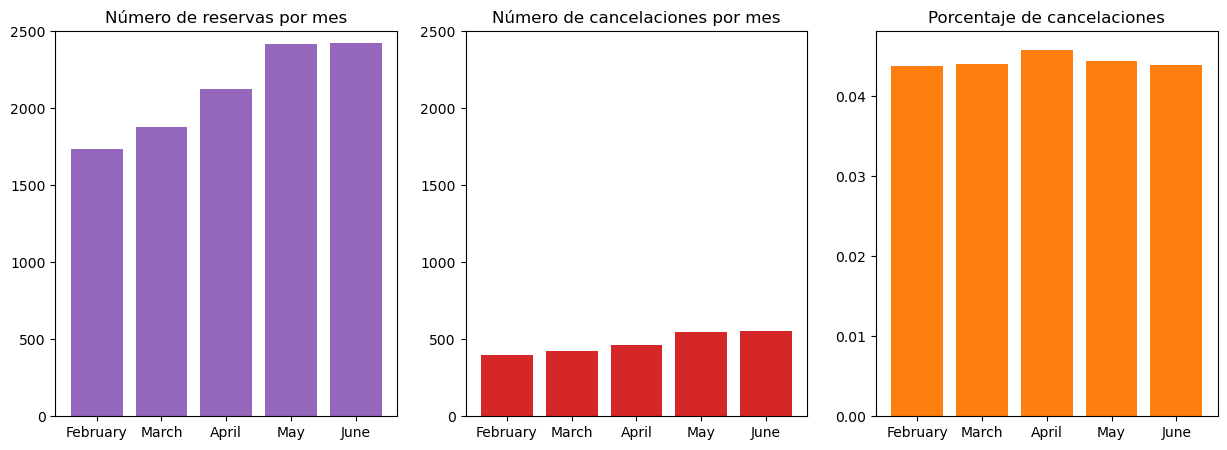

In [110]:
cont = df.groupby('mes').size()
meses = ['','February', 'March', 'April', 'May', 'June']
df2 = pd.DataFrame(cont)
df2 = df2.reset_index()
bilbao_cancelaciones=df[df['cancellation']==1]
cont = bilbao_cancelaciones.groupby('mes').size()
meses = ['','February', 'March', 'April', 'May', 'June']
df3 = pd.DataFrame(cont)
df3 = df3.reset_index()
df_procentajes = pd.DataFrame((df2[0] / df3[0])/100)
fig1, ax1 = plt.subplots(1,3, figsize = (15,5))
ax1[0].bar(df['mes'].unique(), df2[0], color = 'tab:purple')
ax1[0].set_xticklabels(meses)
ax1[0].set_title('Número de reservas por mes')
ax1[0].set_ylim(0, 2500, 50)
ax1[1].bar(bilbao_cancelaciones['mes'].unique(), df3[0], color = 'tab:red')
ax1[1].set_xticklabels(meses)
ax1[1].set_title('Número de cancelaciones por mes')
ax1[1].set_ylim(0, 2500, 50)
ax1[2].bar(bilbao_cancelaciones['mes'].unique(), df_procentajes[0], color = 'tab:orange')
ax1[2].set_xticklabels(meses)
ax1[2].set_title('Porcentaje de cancelaciones')

In [111]:
def grafico1(ciudad:str, limite:int):
    ciudad = ciudad.lower()
    df_c = df[df['ciudad']==ciudad]
    cont = df_c.groupby('mes').size()
    meses = ['','February', 'March', 'April', 'May', 'June']
    df2 = pd.DataFrame(cont)
    df2 = df2.reset_index()
    bilbao_cancelaciones=df_c[df_c['cancellation']==1]
    cont = bilbao_cancelaciones.groupby('mes').size()
    meses = ['','February', 'March', 'April', 'May', 'June']
    df3 = pd.DataFrame(cont)
    df3 = df3.reset_index()
    df_procentajes = pd.DataFrame((df2[0] / df3[0])/100)
    fig1, ax1 = plt.subplots(1,3, figsize = (15,5))
    ax1[0].bar(df_c['mes'].unique(), df2[0], color = 'tab:purple')
    ax1[0].set_xticklabels(meses)
    ax1[0].set_title('Número de reservas por mes')
    ax1[0].set_ylim(0, limite, 50)
    ax1[1].bar(bilbao_cancelaciones['mes'].unique(), df3[0], color = 'tab:red')
    ax1[1].set_xticklabels(meses)
    ax1[1].set_title('Número de cancelaciones por mes')
    ax1[1].set_ylim(0, limite, 50)
    ax1[2].bar(bilbao_cancelaciones['mes'].unique(), df_procentajes[0], color = 'tab:orange')
    ax1[2].set_xticklabels(meses)
    ax1[2].set_title('Porcentaje de cancelaciones')

/tmp/ipykernel_8355/3736716111.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1[0].set_xticklabels(meses)
/tmp/ipykernel_8355/3736716111.py:18: MatplotlibDeprecationWarning: Passing the emit parameter of set_ylim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ax1[0].set_ylim(0, limite, 50)
/tmp/ipykernel_8355/3736716111.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1[1].set_xticklabels(meses)
/tmp/ipykernel_8355/3736716111.py:22: MatplotlibDeprecationWarning: Passing the emit parameter of set_ylim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ax1[1].set_ylim(0, limite, 50)
/tmp/ipykernel_8355/3736716111.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1[2].set_xticklabels(meses)


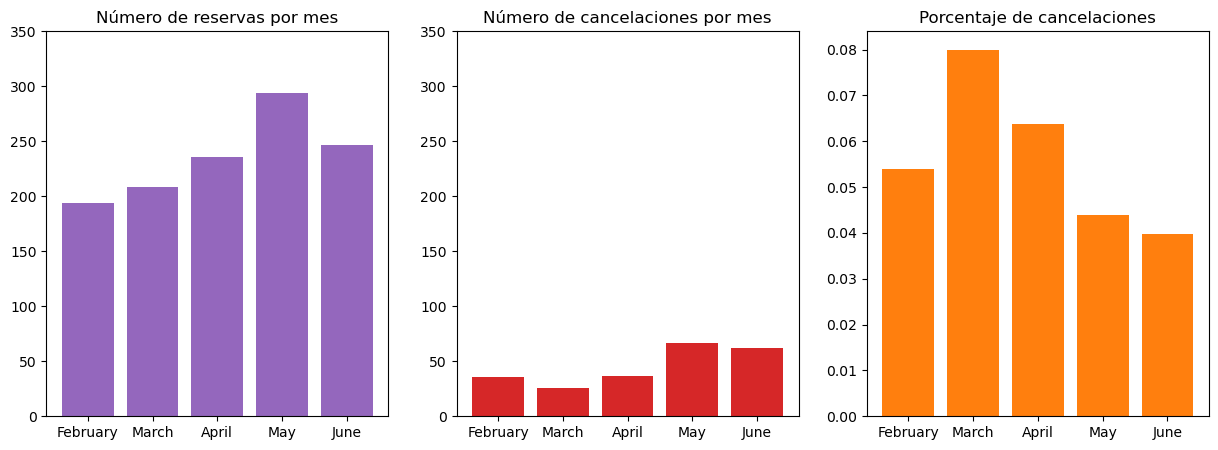

In [112]:
grafico1('malaga', 350)

/tmp/ipykernel_8355/3736716111.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1[0].set_xticklabels(meses)
/tmp/ipykernel_8355/3736716111.py:18: MatplotlibDeprecationWarning: Passing the emit parameter of set_ylim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ax1[0].set_ylim(0, limite, 50)
/tmp/ipykernel_8355/3736716111.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1[1].set_xticklabels(meses)
/tmp/ipykernel_8355/3736716111.py:22: MatplotlibDeprecationWarning: Passing the emit parameter of set_ylim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ax1[1].set_ylim(0, limite, 50)
/tmp/ipykernel_8355/3736716111.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1[2].set_xticklabels(meses)


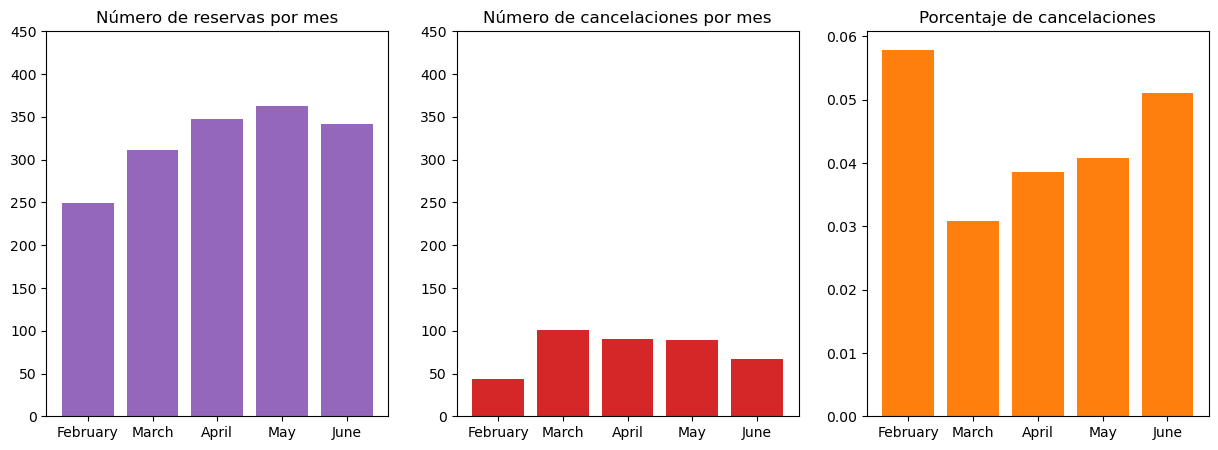

In [113]:
grafico1('bilbao', 450)

/tmp/ipykernel_8355/3736716111.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1[0].set_xticklabels(meses)
/tmp/ipykernel_8355/3736716111.py:18: MatplotlibDeprecationWarning: Passing the emit parameter of set_ylim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ax1[0].set_ylim(0, limite, 50)
/tmp/ipykernel_8355/3736716111.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1[1].set_xticklabels(meses)
/tmp/ipykernel_8355/3736716111.py:22: MatplotlibDeprecationWarning: Passing the emit parameter of set_ylim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ax1[1].set_ylim(0, limite, 50)
/tmp/ipykernel_8355/3736716111.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1[2].set_xticklabels(meses)


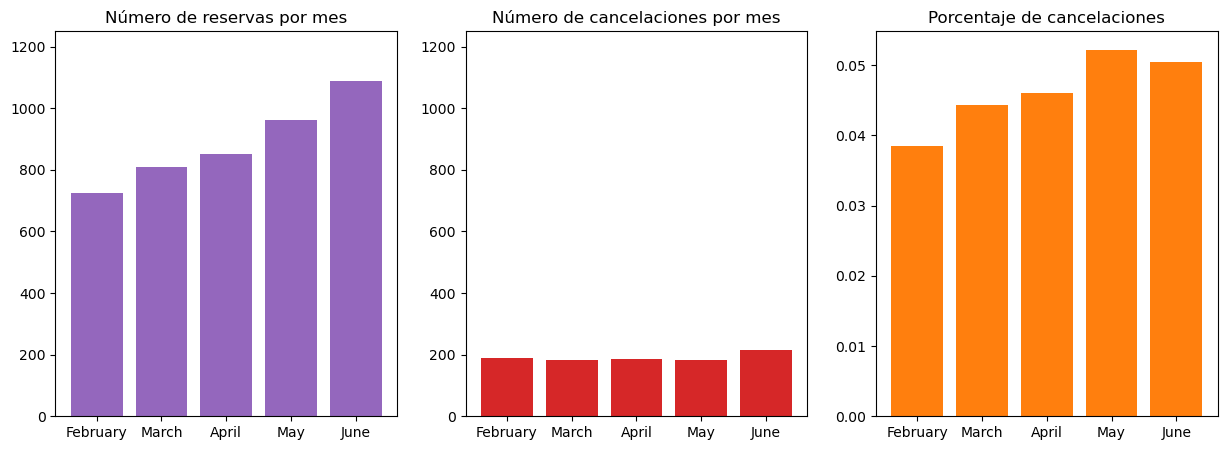

In [114]:
grafico1('vitoria-gasteiz', 1250)

/tmp/ipykernel_8355/3736716111.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1[0].set_xticklabels(meses)
/tmp/ipykernel_8355/3736716111.py:18: MatplotlibDeprecationWarning: Passing the emit parameter of set_ylim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ax1[0].set_ylim(0, limite, 50)
/tmp/ipykernel_8355/3736716111.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1[1].set_xticklabels(meses)
/tmp/ipykernel_8355/3736716111.py:22: MatplotlibDeprecationWarning: Passing the emit parameter of set_ylim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ax1[1].set_ylim(0, limite, 50)
/tmp/ipykernel_8355/3736716111.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1[2].set_xticklabels(meses)


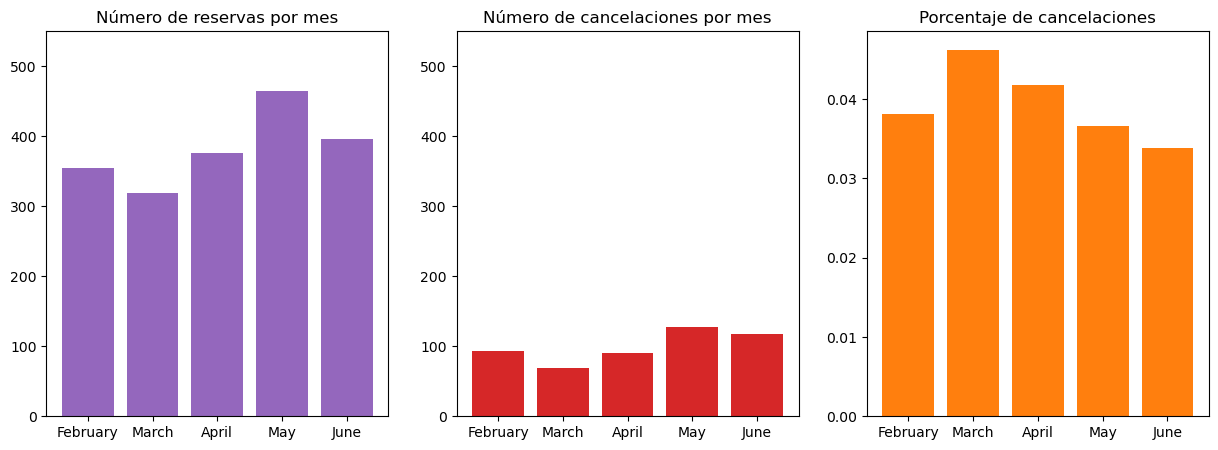

In [115]:
grafico1('madrid', 550)

/tmp/ipykernel_8355/3736716111.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1[0].set_xticklabels(meses)
/tmp/ipykernel_8355/3736716111.py:18: MatplotlibDeprecationWarning: Passing the emit parameter of set_ylim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ax1[0].set_ylim(0, limite, 50)
/tmp/ipykernel_8355/3736716111.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1[1].set_xticklabels(meses)
/tmp/ipykernel_8355/3736716111.py:22: MatplotlibDeprecationWarning: Passing the emit parameter of set_ylim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ax1[1].set_ylim(0, limite, 50)
/tmp/ipykernel_8355/3736716111.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1[2].set_xticklabels(meses)


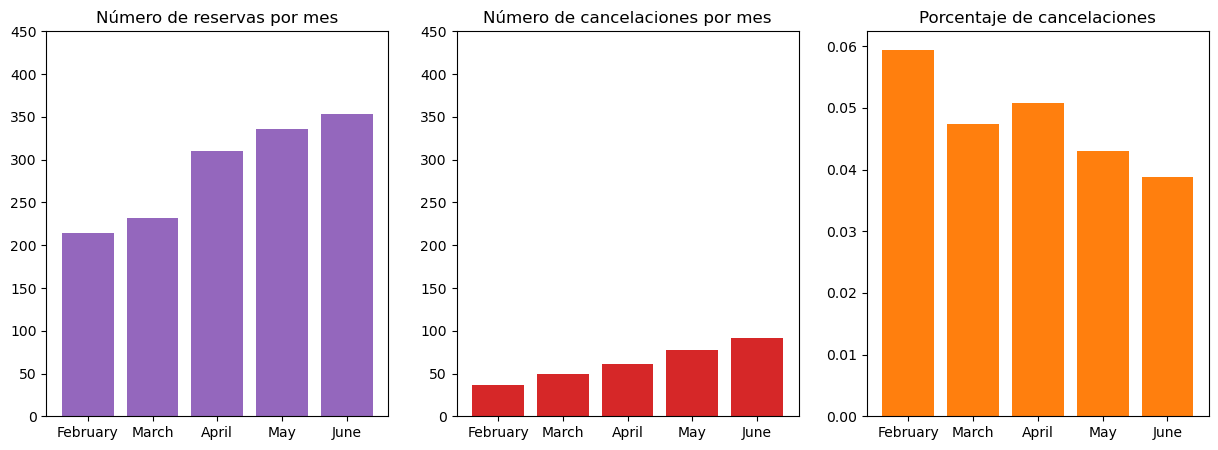

In [116]:
grafico1('valencia', 450)

## Grafico de la temperatura maxima y minima por ciudad

/tmp/ipykernel_8355/2020468445.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  general = clima.groupby('fecha').mean()


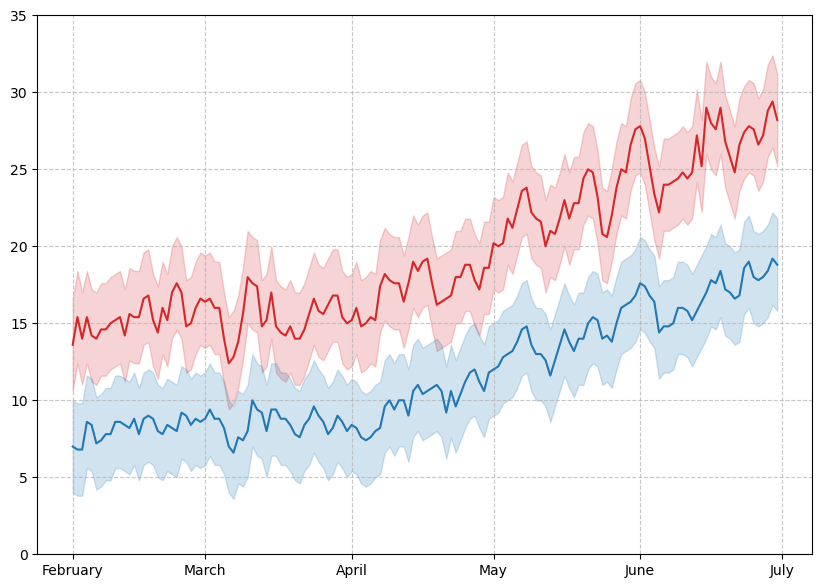

In [117]:
general = clima.groupby('fecha').mean()
general = general.reset_index()
fig, ax = plt.subplots(figsize = (10, 7))
ax.plot(general['fecha'], general['temp_max'], '-', color = 'tab:red')
ax.fill_between(general['fecha'], general['temp_max'] + 3, general['temp_max'] - 3, alpha=0.2, color = 'tab:red')
ax.set_ylim((0,35))
ax.plot(general['fecha'], general['temp_min'], '-', color = 'tab:blue')
ax.fill_between(general['fecha'], general['temp_min'] + 3, general['temp_min'] - 3, alpha=0.2, color = 'tab:blue')
ax.grid(linestyle = '--', alpha = 0.7)
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%B'))

In [118]:
def grafico2(ciudad, lim_b = 0, lim_a = 35):
    ciudad = ciudad.lower()
    general = clima[clima['ciudad']==ciudad]
    fig, ax = plt.subplots(figsize = (10, 7))
    ax.plot(general['fecha'], general['temp_max'], '-', color = 'tab:red')
    ax.fill_between(general['fecha'], general['temp_max'] + 3, general['temp_max'] - 3, alpha=0.2, color = 'tab:red')
    ax.set_ylim((lim_b, lim_a))
    ax.plot(general['fecha'], general['temp_min'], '-', color = 'tab:blue')
    ax.fill_between(general['fecha'], general['temp_min'] + 3, general['temp_min'] - 3, alpha=0.2, color = 'tab:blue')
    ax.grid(linestyle = '--', alpha = 0.7)
    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%B'))

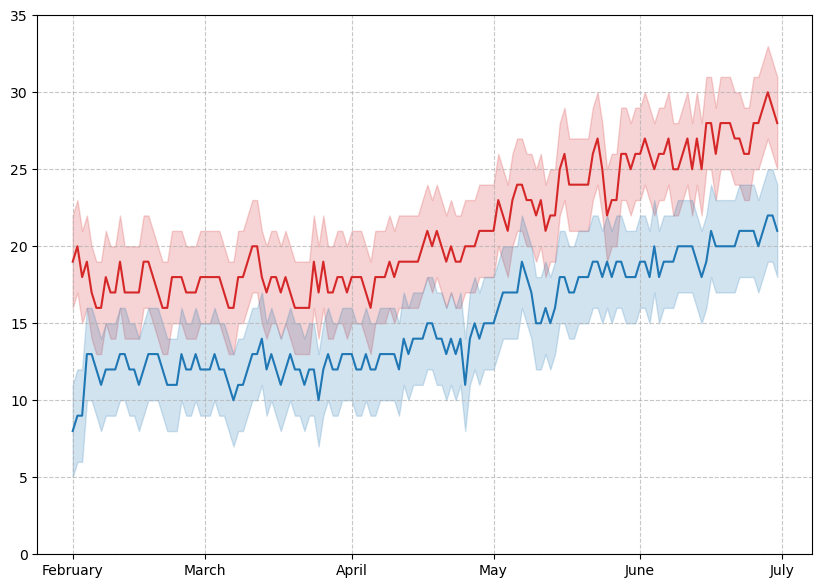

In [119]:
grafico2('malaga')

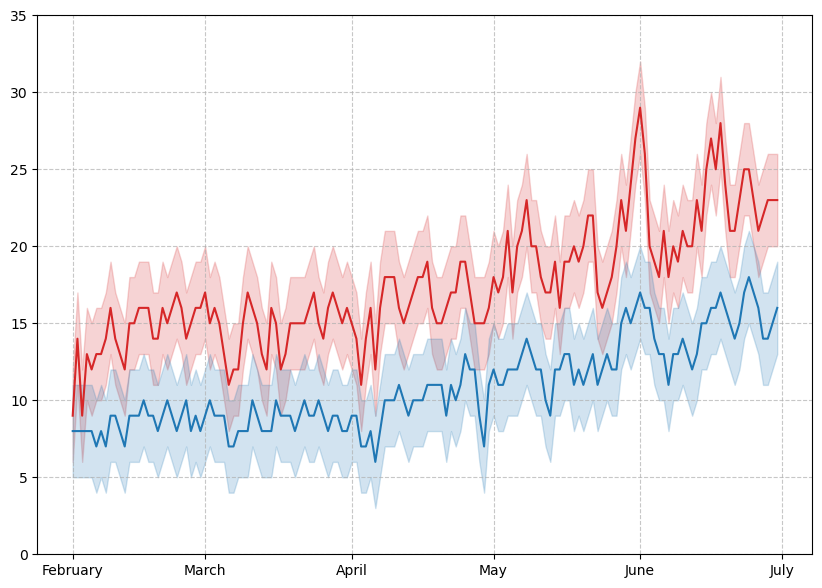

In [120]:
grafico2('bilbao')

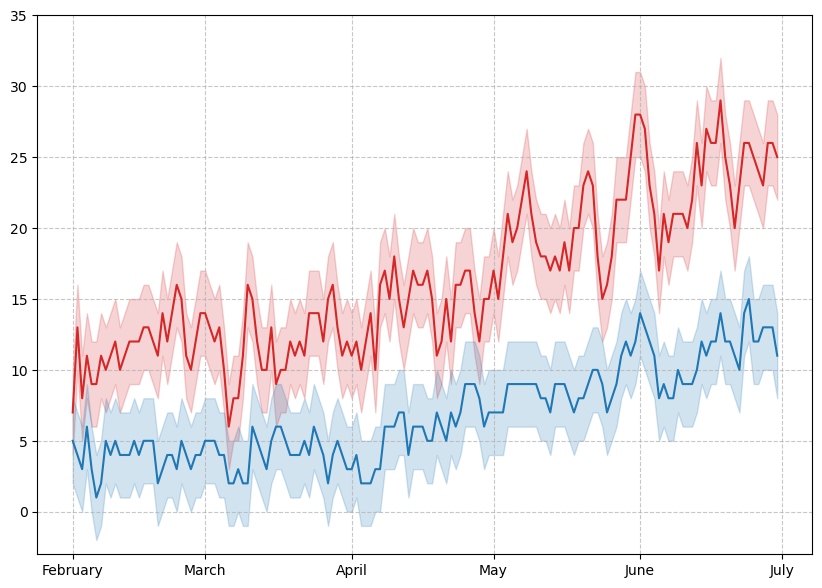

In [121]:
grafico2('vitoria-gasteiz', -3)

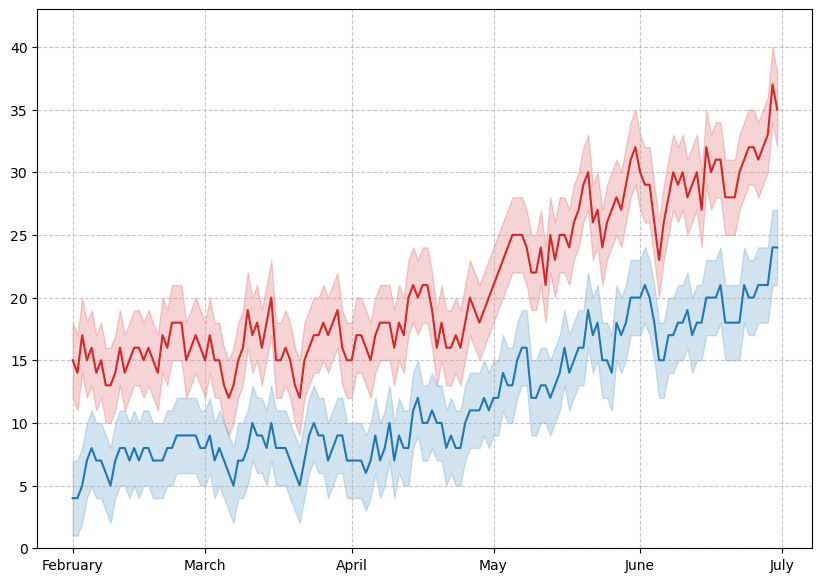

In [122]:
grafico2('madrid', 0 , 43)

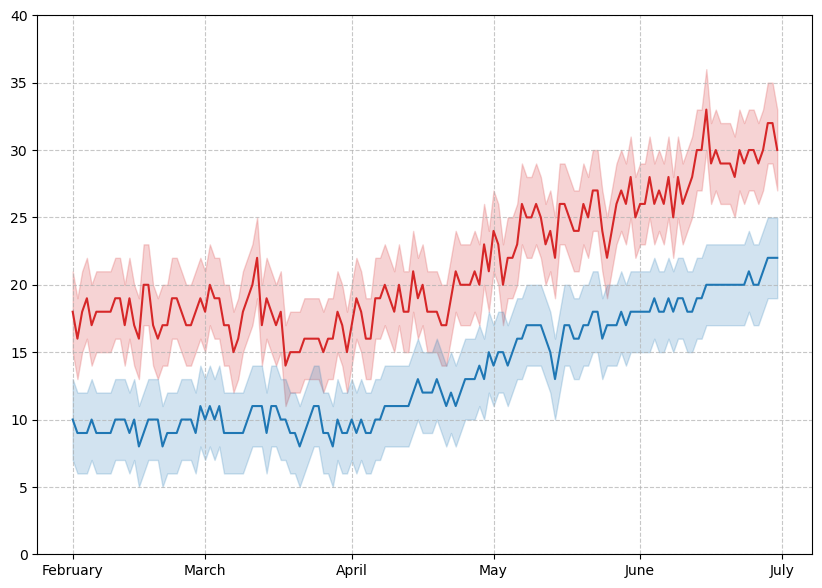

In [123]:
grafico2('valencia', 0, 40)

## Boxplot de gastos por segmento

<AxesSubplot: title={'center': 'reservation_net_value'}, xlabel='segment'>

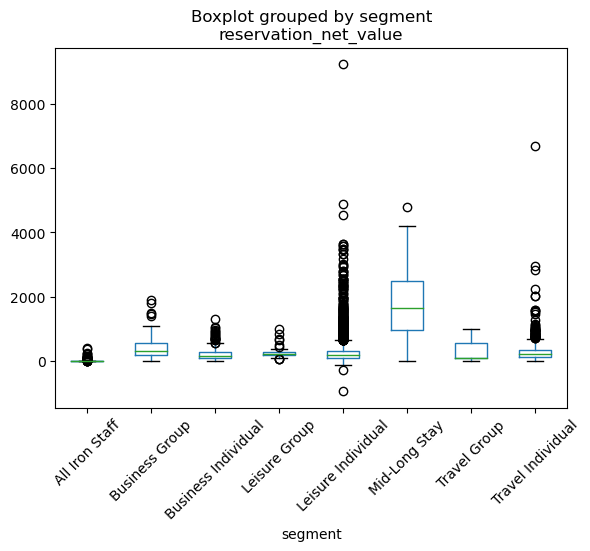

In [124]:
df_o = pd.read_csv('./Datos/Originales/booking_data_for_cancellation_proyecto.csv')
df_o.boxplot('reservation_net_value', 'segment', rot=45, grid = False)

# Otro graficos

In [125]:
df=df.astype({'cancellation':'bool'})
df['checkin_time']= pd.to_datetime(df['checkin_time'] )

df['booking_time']= pd.to_datetime(df['booking_time'] )

df['checkout_time']= pd.to_datetime(df['checkout_time'] )


In [126]:
df_graficos=df[(df['cancelled_at']!='No cancelado')]
df_graficos['cancelled_imp']=pd.to_datetime(df_graficos['cancelled_imp'])

In [127]:
df_graficos['meses_cancelacion']=df_graficos['cancelled_imp'].dt.month
df_graficos['meses_reservas']=df_graficos['booking_time'].dt.month
df_graficos['anyo_reservas']=df_graficos['booking_time'].dt.year
df_graficos['anyo_cancelacion']=df_graficos['cancelled_imp'].dt.year


In [128]:
df_graficos=df_graficos[df_graficos['anyo_reservas']==2022]

In [129]:
a=df_graficos.groupby('meses_cancelacion')['cancelled_imp'].count().reset_index().rename(columns={'cancelled_imp':'total_cancelados'})
a

,meses_cancelacion,total_cancelados
0,1,8212
1,2,364
2,3,465
3,4,434
4,5,520
5,6,331
6,7,26


In [130]:
b=df_graficos.groupby('meses_reservas')['booking_time'].count().reset_index().rename(columns={'booking_time':'total_reservas'})
b

,meses_reservas,total_reservas
0,1,516
1,2,2027
2,3,2160
3,4,2024
4,5,2215
5,6,1410


/tmp/ipykernel_8355/609835563.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['','Ene.','Febr.','Mar.','Abr.','May.','Jun.','Jul.'])


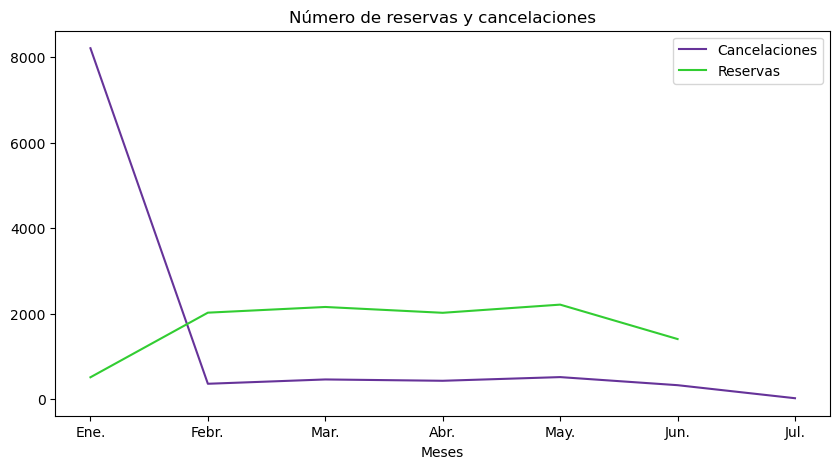

In [131]:
fig, ax = plt.subplots(figsize=[10,5])
ax.plot(a['meses_cancelacion'],a['total_cancelados'],color='rebeccapurple', label='Cancelaciones')
ax.plot(b['meses_reservas'],b['total_reservas'],color='limegreen',label='Reservas')
ax.set_title('Número de reservas y cancelaciones')
ax.set_xlabel('Meses')
ax.legend(loc = 'upper right')
ax.set_xticklabels(['','Ene.','Febr.','Mar.','Abr.','May.','Jun.','Jul.'])
plt.show()

## Graficos de barras

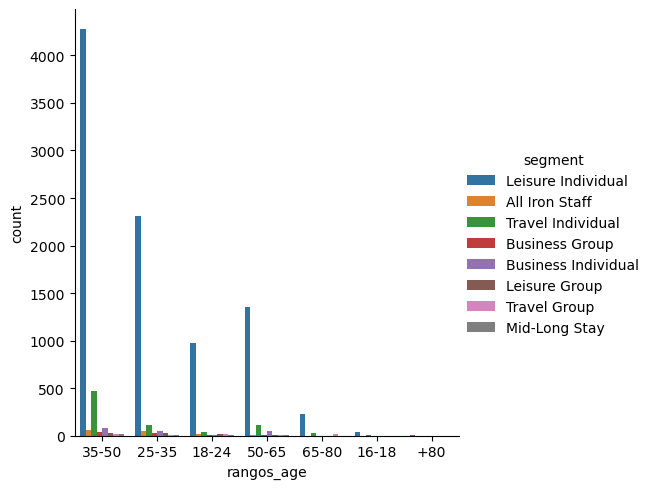

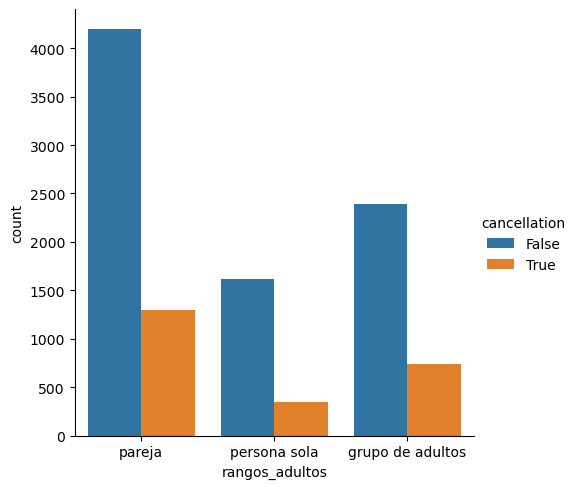

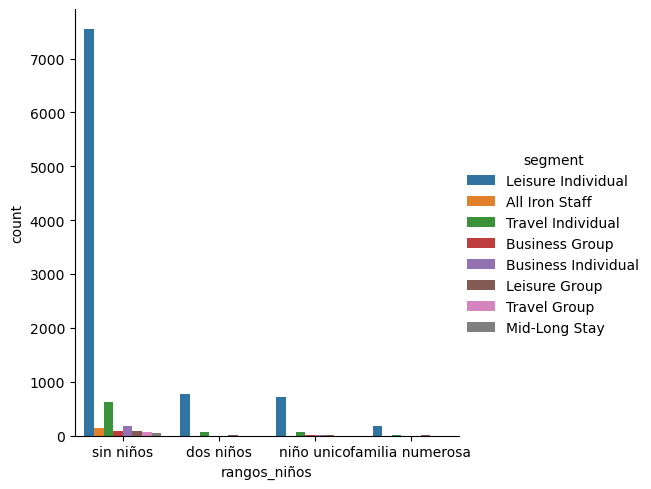

In [132]:
g = sns.catplot(x="rangos_age",
                hue="segment", kind="count",
                data=df)

g2 = sns.catplot(x="rangos_adultos",
                hue="cancellation", kind="count",
                data=df, legend=['No cancelado', 'Cancelado'])
g2.set_titles(main='Cancelaciones en funcion de cantidad de adultos por reserva')

g3 = sns.catplot(x="rangos_niños",
                hue="segment", kind="count",
                data=df)

## Correlaciones

/tmp/ipykernel_8355/3346720154.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<AxesSubplot: >

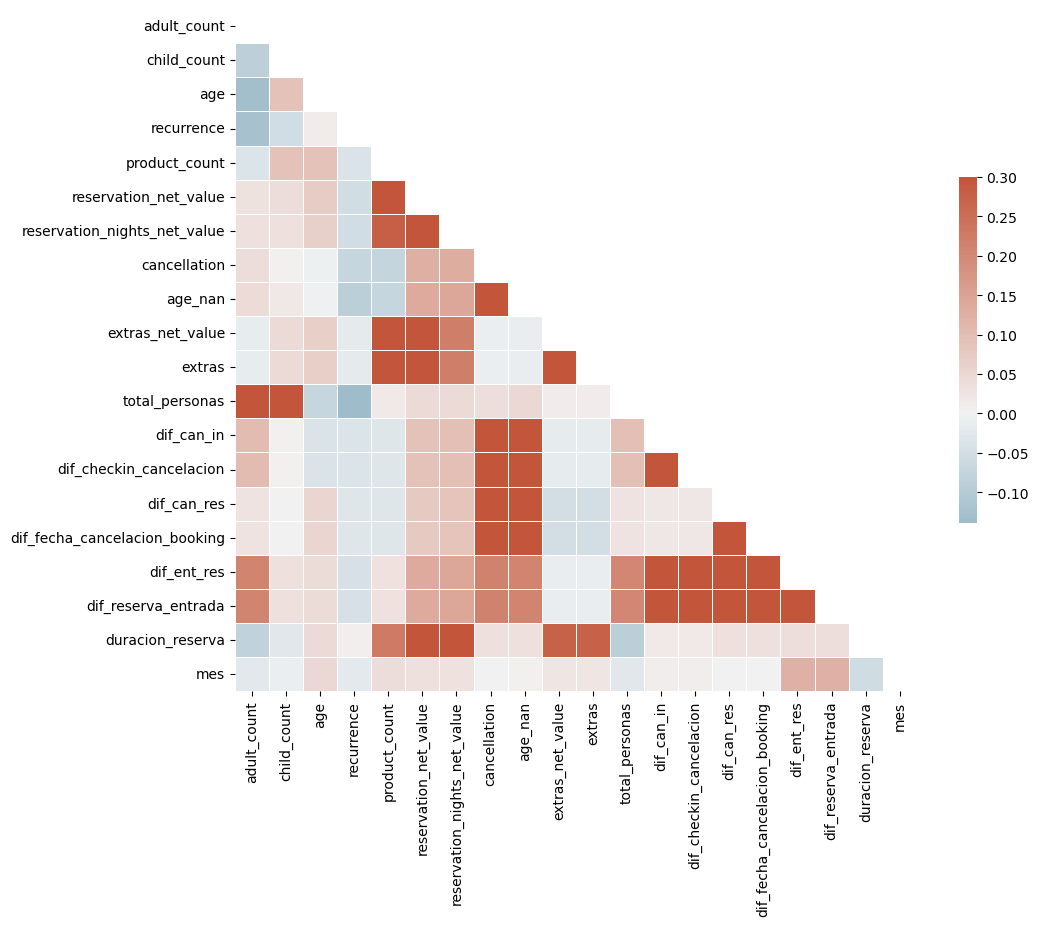

In [133]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## Calendarios de calor

In [134]:
def calendario_grafico(x):
    """_summary_

    Args:
        x (datetime): Columna de dataframe que queremos analizar
    """
    calendario_df=df.copy()
    calendario_df['meses']=calendario_df[x].dt.month
    calendario_df['dias']=calendario_df[x].dt.day
    calendario_df['anyo']=calendario_df[x].dt.year
    calendario_df=calendario_df[calendario_df['anyo']!=2021]
    h=[]
    for i in calendario_df[x]:
        weekday=i.isoweekday()
        h.append(weekday)
    calendario_df['weekday']=h
    df_grafico = pd.crosstab(index=calendario_df['weekday'], columns = calendario_df['meses'], values = calendario_df[x], aggfunc = 'count')
    fig3,ax3=plt.subplots(figsize = (10,5))
    ax3=sns.heatmap(df_grafico,cmap='YlOrBr',annot=False)
    ax3.set_title(f'Grafico de número de {x} en el año 2022')
    ax3.set_xticklabels(['Enero','Febrero','Marzo','Abril','Mayo','Junio'])
    ax3.set_yticklabels(['L','M','X','J','V','S','D'])
    fig=fig3.get_figure()
    fig.savefig("./Graficos/calendario"+x+".png",dpi=100)

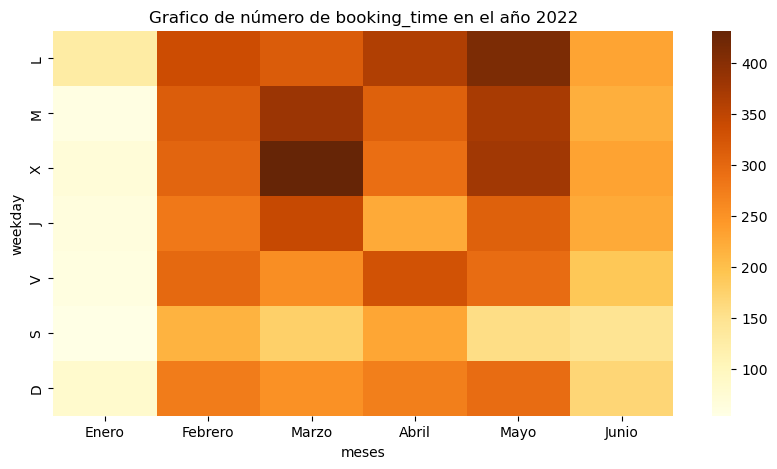

In [135]:
calendario_grafico('booking_time')

In [136]:
def calendario_grafico2(x):
    """_summary_

    Args:
        x (datetime): Columna de dataframe que queremos analizar
    """
    calendario_df=df.copy()
    calendario_df['meses']=calendario_df[x].dt.month
    calendario_df['dias']=calendario_df[x].dt.day
    calendario_df['anyo']=calendario_df[x].dt.year
    calendario_df=calendario_df[calendario_df['anyo']!=2021]
    h=[]
    for i in calendario_df[x]:
        weekday=i.isoweekday()
        h.append(weekday)
    calendario_df['weekday']=h
    df_grafico = pd.crosstab(index=calendario_df['weekday'], columns = calendario_df['meses'], values = calendario_df[x], aggfunc = 'count')
    fig3,ax3=plt.subplots(figsize = (10,5))
    ax3=sns.heatmap(df_grafico,cmap='YlOrBr',annot=False)
    ax3.set_title(f'Grafico de número de {x} en el año 2022')
    ax3.set_xticklabels(['Febrero','Marzo','Abril','Mayo','Junio'])
    ax3.set_yticklabels(['L','M','X','J','V','S','D'])
    fig=fig3.get_figure()
    fig.savefig("./Graficos/calendario"+x+".png",dpi=100)

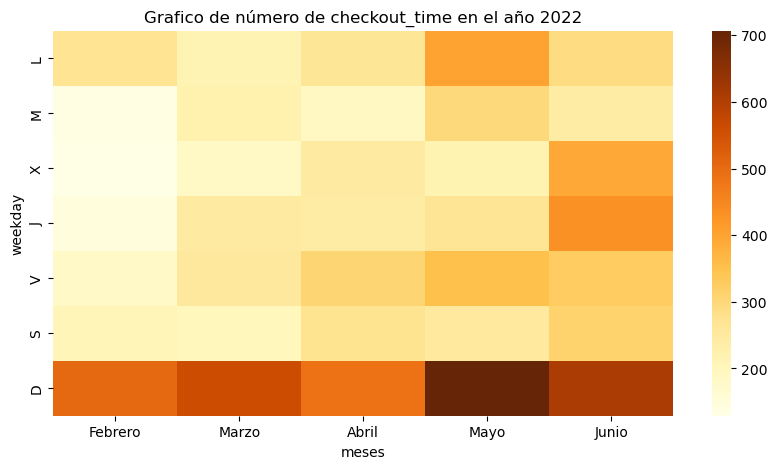

In [137]:
calendario_grafico2('checkout_time')

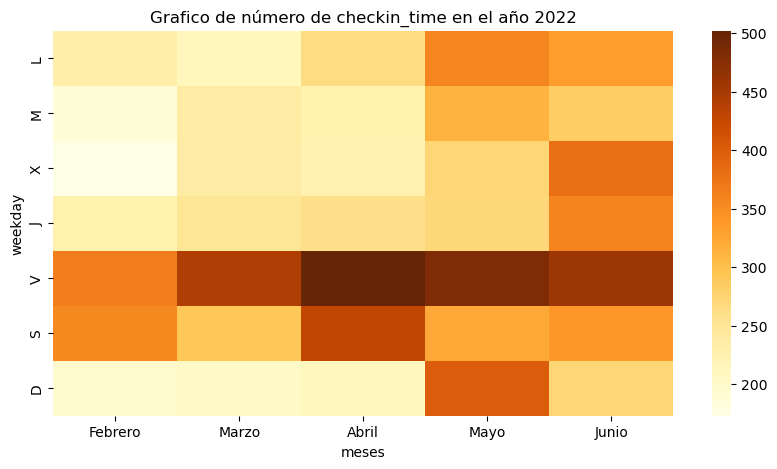

In [138]:
calendario_grafico2('checkin_time')

##### Mapa de calor con los cancelados

Separamos los datos de los clientes que no cancelaron y hacemos una copia sobre la que iremos modificando los datos

In [139]:
cancelados=df[(df['cancelled_at']!='No cancelado')]
cancelados_df=cancelados.copy()
cancelados_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10582 entries, 0 to 10581
Data columns (total 44 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   asset                          10582 non-null  object             
 1   asset_type                     10582 non-null  object             
 2   brand                          10582 non-null  object             
 3   segment                        10582 non-null  object             
 4   checkin_time                   10582 non-null  datetime64[ns, UTC]
 5   checkout_time                  10582 non-null  datetime64[ns, UTC]
 6   booking_time                   10582 non-null  datetime64[ns, UTC]
 7   adult_count                    10582 non-null  int64              
 8   child_count                    10582 non-null  int64              
 9   origin                         10582 non-null  object             
 10  travel_agency_name    

cambiamos la columna donde tenemos la fecha en la que cancelaron a tipo date

In [140]:
cancelados_df['cancelled_imp']=pd.to_datetime(cancelados_df['cancelled_imp'])

Seleccionamos los meses, dias y año en el que se cancelaron y creamos columnas nuevas

In [141]:
cancelados_df['meses']=cancelados_df['cancelled_imp'].dt.month
cancelados_df['dias']=cancelados_df['cancelled_imp'].dt.day
cancelados_df['anyo']=cancelados_df['cancelled_imp'].dt.year
cancelados_df['anyo']

0        2022
1        2000
2        2000
3        2000
4        2000
         ... 
10577    2000
10578    2000
10579    2000
10580    2000
10581    2000
Name: anyo, Length: 10582, dtype: int64

Filtramos por el año 2022 para quedarnos solo con los datos del ultimo año

In [142]:
cancelados_df=cancelados_df[cancelados_df['anyo']!=2021]

Creamos una columna nueva llamada weekday donde guardaremos a que dia de la semana pertenece cada cancelación

In [143]:
h=[]
for i in cancelados_df['cancelled_imp']:
    weekday=i.isoweekday()
    h.append(weekday)

cancelados_df['weekday']=h

Creamos el grafico

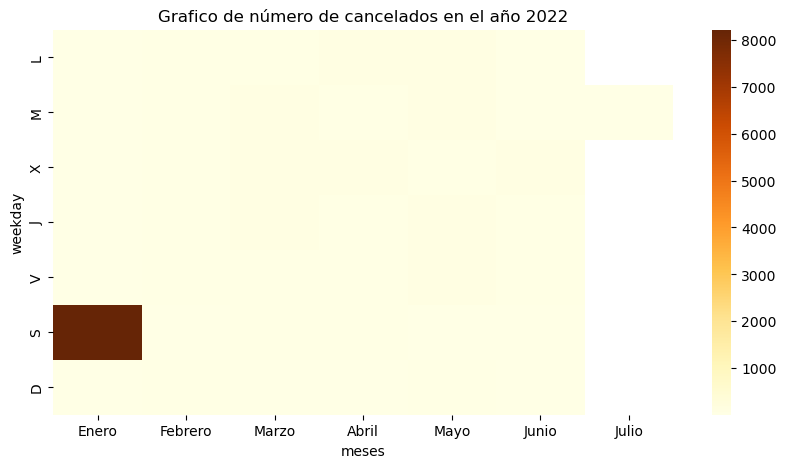

In [144]:
df_grafico_cancel = pd.crosstab(index=cancelados_df['weekday'], columns = cancelados_df['meses'], values = cancelados_df['cancelled_imp'], aggfunc = 'count')
fig3,ax3=plt.subplots(figsize = (10,5))
ax3=sns.heatmap(df_grafico_cancel,cmap='YlOrBr',annot=False)
ax3.set_title(f'Grafico de número de cancelados en el año 2022')
ax3.set_xticklabels(['Enero','Febrero','Marzo','Abril','Mayo','Junio','Julio'])
ax3.set_yticklabels(['L','M','X','J','V','S','D'])
fig2=fig3.get_figure()
fig2.savefig("./Graficos/calendario_cancelados.png",dpi=100)

Analisis de conteo de las variables por meses y por dias de la semana

1. cancelaciones

In [145]:
cancelados_df.groupby('meses')['cancelled_imp'].count().sort_values(ascending=False)

meses
1    8317
5     521
3     474
4     441
2     388
6     332
7      26
Name: cancelled_imp, dtype: int64

In [146]:
cancelados_df.groupby('weekday')['cancelled_imp'].count().sort_values(ascending=False)

weekday
6    8416
3     421
2     383
4     360
1     345
5     335
7     239
Name: cancelled_imp, dtype: int64

In [147]:
cancelados_df.groupby(['meses', 'weekday'])['cancelled_imp'].count()

meses  weekday
1      1            23
       2            19
       3            15
       4            23
       5            12
       6          8211
       7            14
2      1            55
       2            60
       3            65
       4            59
       5            57
       6            43
       7            49
3      1            69
       2            81
       3           103
       4            81
       5            57
       6            45
       7            38
4      1            81
       2            66
       3            87
       4            57
       5            63
       6            46
       7            41
5      1            79
       2            90
       3            72
       4            80
       5            93
       6            42
       7            65
6      1            38
       2            41
       3            79
       4            60
       5            53
       6            29
       7            32
7      2           

funcion para el conteo

In [148]:
def conteo_variables(df,x,y):
    """_summary_

    Args:
        df (DataFrame): Data Frame
        x (datetime): Columna que queremos analizar
        y (datetime): Variable por la que vamos a agrupar
    """
    conteo=df.copy()
    conteo['meses']=df[x].dt.month
    conteo['dias']=df[x].dt.day
    conteo['anyo']=df[x].dt.year
    conteo=conteo[conteo['anyo']!=2021]
    h=[]
    for i in conteo[x]:
        weekday=i.isoweekday()
        h.append(weekday)
    conteo['weekday']=h
    cont=conteo.groupby(y)[x].count().sort_values(ascending=False)
    print(cont)

In [149]:
def conteo_semxmes(df,x,y,z):
    """_summary_

    Args:
        df (dataFrame): Data frame
        x (datetime): Seleccionamos la columna que queramos analizar
        y (datetime): variable por la que vamos ha agrupar
        z (datetime): variable por la que vamos ha agrupar
    """
    conteo=df.copy()
    conteo['meses']=df[x].dt.month
    conteo['dias']=df[x].dt.day
    conteo['anyo']=df[x].dt.year
    conteo=conteo[conteo['anyo']!=2021]
    h=[]
    for i in conteo[x]:
        weekday=i.isoweekday()
        h.append(weekday)
    conteo['weekday']=h
    cont=conteo.groupby([y,z])[x].count()
    print(cont)

2. Reservas

In [150]:
conteo_variables(df,'booking_time','meses')

meses
5    2215
3    2160
2    2027
4    2024
6    1410
1     516
Name: booking_time, dtype: int64


In [151]:
conteo_variables(df,'booking_time','weekday')

weekday
1    1785
3    1707
2    1655
4    1446
5    1432
7    1349
6     978
Name: booking_time, dtype: int64


In [152]:
conteo_semxmes(df,'booking_time','meses','weekday')

meses  weekday
1      1          128
       2           58
       3           70
       4           63
       5           60
       6           54
       7           83
2      1          337
       2          315
       3          304
       4          281
       5          300
       6          214
       7          276
3      1          316
       2          383
       3          432
       4          343
       5          256
       6          178
       7          252
4      1          364
       2          310
       3          293
       4          225
       5          329
       6          229
       7          274
5      1          410
       2          370
       3          376
       4          310
       5          296
       6          157
       7          296
6      1          230
       2          219
       3          232
       4          224
       5          191
       6          146
       7          168
Name: booking_time, dtype: int64


3. Check in

In [ ]:
conteo_variables(df,'checkin_time','meses')

In [ ]:
conteo_variables(df,'checkin_time','weekday')

In [ ]:
conteo_semxmes(df,'checkin_time','meses','weekday')

4. Check out

In [ ]:
conteo_variables(df,'checkout_time','meses')

In [ ]:
conteo_variables(df,'checkout_time','weekday')

In [ ]:
conteo_semxmes(df,'checkout_time','meses','weekday')